In [1]:
import numpy as np
import matplotlib.pyplot as plt

from distributions.sequence import Sequence
from algorithms.semi_bandit_exp3 import SemiBanditExp3

In [2]:
length = 2000
d = 2
K = 2

actionset = [np.ones(K, dtype=bool)]
for i in range(K):
    buffer = np.zeros(K, dtype=bool)
    buffer[i] = 1
    actionset.append(buffer)
actionset = np.array(actionset)

seq = Sequence(length=length, d=d, actionset=actionset)
seq.theta = np.ones((length, d, K))
set_to_zero = np.random.randint(K * d, size=(length))
for i in range(length):
    seq.theta[i, set_to_zero[i]//K, set_to_zero[i]%K] = 0


seq.contexts = np.zeros((length, d), dtype=int)
for i in range(length):
    seq.contexts[i, np.random.choice(d)] = 1

seq.contexts = seq.contexts / np.max(np.linalg.norm(seq.contexts, axis=1))
#seq.contexts = np.random.rand(length, d) 
seq.contexts = seq.contexts / np.max(np.linalg.norm(seq.contexts, axis=1))

seq.sigma = np.max(np.linalg.norm(seq.contexts, axis=1))
seq.lambda_min = 1/d
seq.R = 2

def unbiased_context_estimator(rng: np.random.Generator):
    result = np.zeros(d, dtype=int)
    result[rng.choice(d)] = 1
    return result

seq.context_unbiased_estimator = unbiased_context_estimator



In [3]:
alg = SemiBanditExp3()

# def unbiased_context_estimator(rng: np.random.Generator):
#     return np.random.rand(d) 

alg.set_constants(np.random.default_rng(), seq)
print(alg.eta, alg.gamma, alg.M)

0.0021006521087167714 0.26149315350917884 125


In [4]:
total_loss, losses = alg.run_on_sequence(alg.mgr_rng, seq)
optimal_policy_total_loss, optimal_policy_loss, optimal_policy = seq.find_optimal_policy()

print(total_loss, optimal_policy_total_loss, total_loss-np.sum(optimal_policy_loss))


1717.0 1486.0 231.0


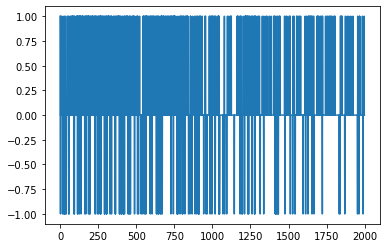

/var/folders/bh/7_qb6d0j10b773spjmf3nmsw0000gp/T/ipykernel_75390/234505364.py:5: RuntimeWarning: invalid value encountered in sqrt
  return 8 * seq.m * np.sqrt(T * K * d * np.log(np.e * K / seq.m) * np.log(np.sqrt(T) * seq.m * seq.sigma * seq.R))


<function matplotlib.pyplot.show(*args, **kw)>

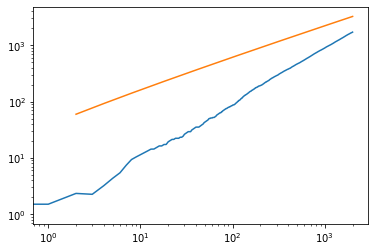

In [8]:
plt.plot(losses - optimal_policy_loss[1:])
plt.show()

def theoretical_bound(T):
    return 8 * seq.m * np.sqrt(T * K * d * np.log(np.e * K / seq.m) * np.log(np.sqrt(T) * seq.m * seq.sigma * seq.R))

plt.loglog(np.cumsum(losses) - np.cumsum(optimal_policy_loss[1:]) / (np.arange(len(losses)) + 1))

x = np.linspace(1e-32, length, 1000)
plt.loglog(x, theoretical_bound(x))
plt.show